In [ ]:
#!unzip "/content/Copy of OD_25.zip" -d "/content/sample_data/Untitled Folder"

In [ ]:
#!unzip "/content/patches_25.zip" -d "/content/sample_data/Patches"

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os
os.listdir()

['.config', 'sample_data']

In [ ]:
#listing1=os.listdir("/content/sample_data/Untitled Folder/content/patches")

In [ ]:
#listing2=os.listdir("/content/sample_data/Patches/content/25_patches")

In [4]:
listing_XTRAIN=os.listdir("drive/MyDrive/patches_60k__")      # x- train

In [5]:
listing_YTRAIN=os.listdir("drive/MyDrive/ODpatches60K__")    # Y- train

In [6]:
listing_XTEST=os.listdir("drive/MyDrive/25_patches_")    # x - test

In [7]:
import numpy as np

In [8]:
num_samples=np.size(listing_XTRAIN)
print(num_samples)

10


In [9]:
import keras
import os
import cv2
import numpy as np
import glob
import tensorflow as tf
from PIL import Image
import sys
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D , Dropout, Add, BatchNormalization
from keras.models import Model
from tensorflow.keras.utils import load_img
#from keras.preprocessing.image import load_img
from matplotlib import pyplot as plt
from keras.layers import concatenate
Trainimages_path ='drive//MyDrive/patches_60k__'    # xtrain
Trainod_path ='drive/MyDrive/ODpatches60K__'    # Ytrain

In [10]:
Testimages_path ='drive//MyDrive/25_patches_'    # xtest

In [11]:
#path with all the images
l = os.listdir(Trainimages_path)
lsorted = sorted(l,key=lambda x: os.path.splitext(x)[0])
def read_images(Trainimages_path) :

    images = []
    mat_imgs = []
    grayim=[]
    for file in lsorted:
        img = cv2.imread(Trainimages_path+"/" + file)
        print (Trainimages_path+"/"+file)
        images.append(img)
        #print(images)
        mat_im = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        #print(file)
        mat_imgs.append(np.array(mat_im))
        grayi= cv2.cvtColor(mat_im,cv2.COLOR_RGB2GRAY)
        grayim.append(np.array(grayi))
    return images,mat_imgs,grayim


In [12]:
imgs,mat,grayimage = read_images(Trainimages_path)


drive//MyDrive/patches_60k__/drishtiGS_091.png_25_778_1029.png
drive//MyDrive/patches_60k__/drishtiGS_091.png_25_778_1032.png
drive//MyDrive/patches_60k__/drishtiGS_091.png_25_779_1047.png
drive//MyDrive/patches_60k__/drishtiGS_091.png_25_780_1054.png
drive//MyDrive/patches_60k__/drishtiGS_091.png_25_781_1001.png
drive//MyDrive/patches_60k__/drishtiGS_091.png_25_781_1011.png
drive//MyDrive/patches_60k__/drishtiGS_091.png_25_781_1043.png
drive//MyDrive/patches_60k__/drishtiGS_091.png_25_781_1044.png
drive//MyDrive/patches_60k__/drishtiGS_091.png_25_781_1048.png
drive//MyDrive/patches_60k__/drishtiGS_091.png_25_781_1067.png


In [13]:
#path with all the images
l = os.listdir(Testimages_path)
lsorted = sorted(l,key=lambda x: os.path.splitext(x)[0])
def read_images(Testimages_path) :

    test_images = []
    test_mat_imgs = []
    test_grayim=[]
    for file in lsorted:
        img = cv2.imread(Testimages_path+"/" + file)
        print (Testimages_path+"/"+file)
        test_images.append(img)
        #print(images)
        test_mat_im = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        #print(file)
        test_mat_imgs.append(np.array(test_mat_im))
        test_grayi= cv2.cvtColor(test_mat_im,cv2.COLOR_RGB2GRAY)
        test_grayim.append(np.array(test_grayi))
    return test_images,test_mat_imgs,test_grayim


In [14]:
test_imgs,test_mat,test_grayimage = read_images(Testimages_path)


drive//MyDrive/25_patches_/image_ambiguity_091_25_220_389.png
drive//MyDrive/25_patches_/image_ambiguity_091_25_220_396.png
drive//MyDrive/25_patches_/image_ambiguity_091_25_220_397.png
drive//MyDrive/25_patches_/image_ambiguity_091_25_221_371.png
drive//MyDrive/25_patches_/image_ambiguity_091_25_221_373.png
drive//MyDrive/25_patches_/image_ambiguity_091_25_221_374.png
drive//MyDrive/25_patches_/image_ambiguity_091_25_221_375.png
drive//MyDrive/25_patches_/image_ambiguity_091_25_221_376.png
drive//MyDrive/25_patches_/image_ambiguity_091_25_221_377.png
drive//MyDrive/25_patches_/image_ambiguity_091_25_221_378.png


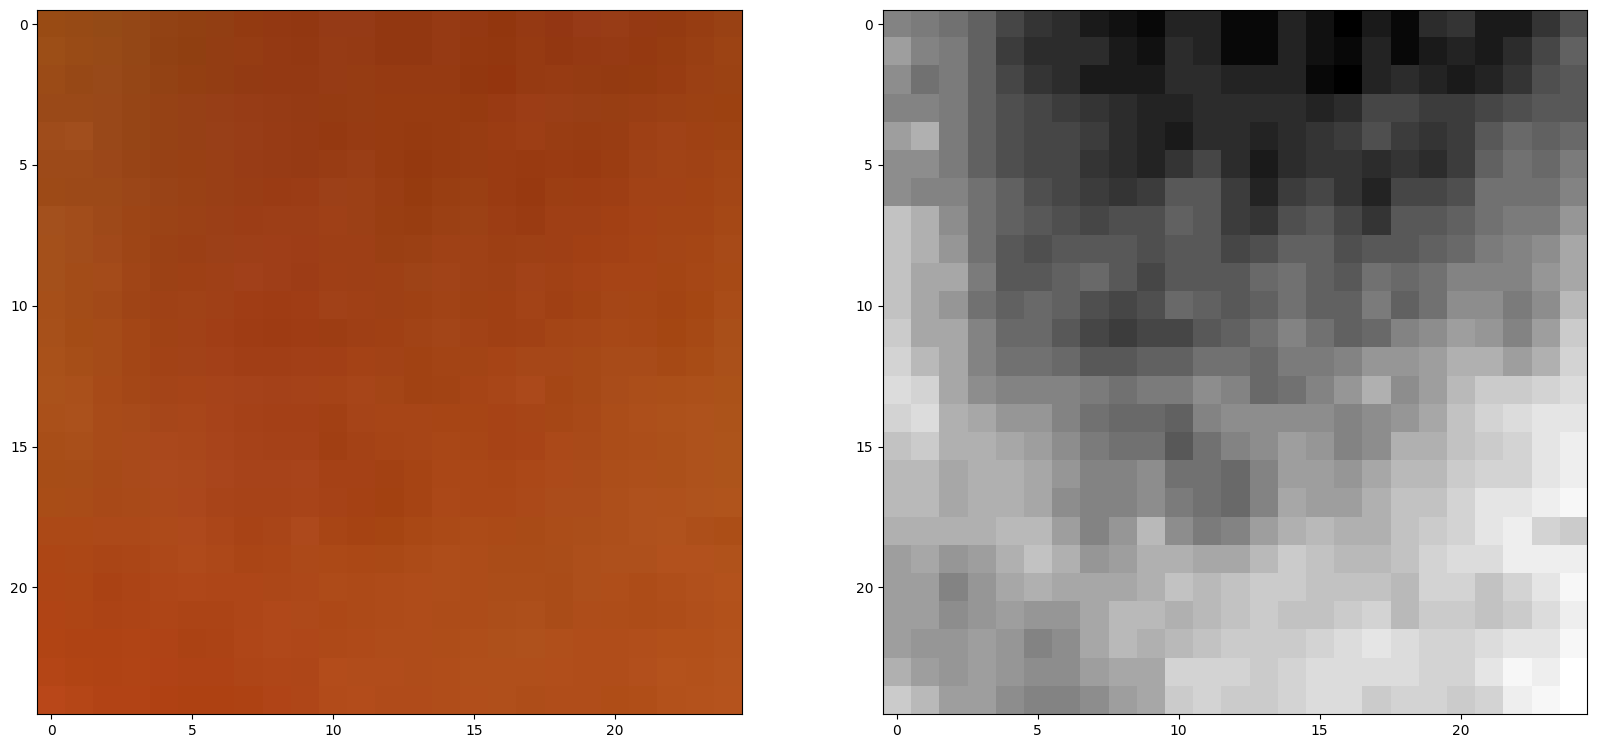

In [15]:
i=1
fig,ax = plt.subplots(1,2,figsize = (20,16))
ax[0].imshow(mat[i])
ax[1].imshow(grayimage[i],cmap='gray')

In [16]:
def read_masks(Trainod_path):
    l = os.listdir(Trainod_path)
    #print(l)
    lsorted = sorted(l,key=lambda x: os.path.splitext(x)[0])
    images = []
    for file in lsorted:
        img = cv2.imread(Trainod_path+"/" + file)
        mat_im = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        print(Trainod_path + file)
        images.append(np.array(img))
        #mat_im.append(mat_im)
    return images

In [17]:
masks = read_masks(Trainod_path)

drive/MyDrive/ODpatches60K__drishtiGS_091_ODsegSoftmap.png_25_778_1029.jpg
drive/MyDrive/ODpatches60K__drishtiGS_091_ODsegSoftmap.png_25_778_1030.jpg
drive/MyDrive/ODpatches60K__drishtiGS_091_ODsegSoftmap.png_25_778_1031.jpg
drive/MyDrive/ODpatches60K__drishtiGS_091_ODsegSoftmap.png_25_778_1032.jpg
drive/MyDrive/ODpatches60K__drishtiGS_091_ODsegSoftmap.png_25_779_1047.jpg
drive/MyDrive/ODpatches60K__drishtiGS_091_ODsegSoftmap.png_25_780_1030.jpg
drive/MyDrive/ODpatches60K__drishtiGS_091_ODsegSoftmap.png_25_780_1033.jpg
drive/MyDrive/ODpatches60K__drishtiGS_091_ODsegSoftmap.png_25_780_1058.jpg
drive/MyDrive/ODpatches60K__drishtiGS_091_ODsegSoftmap.png_25_781_1001.jpg
drive/MyDrive/ODpatches60K__drishtiGS_091_ODsegSoftmap.png_25_781_1011.jpg


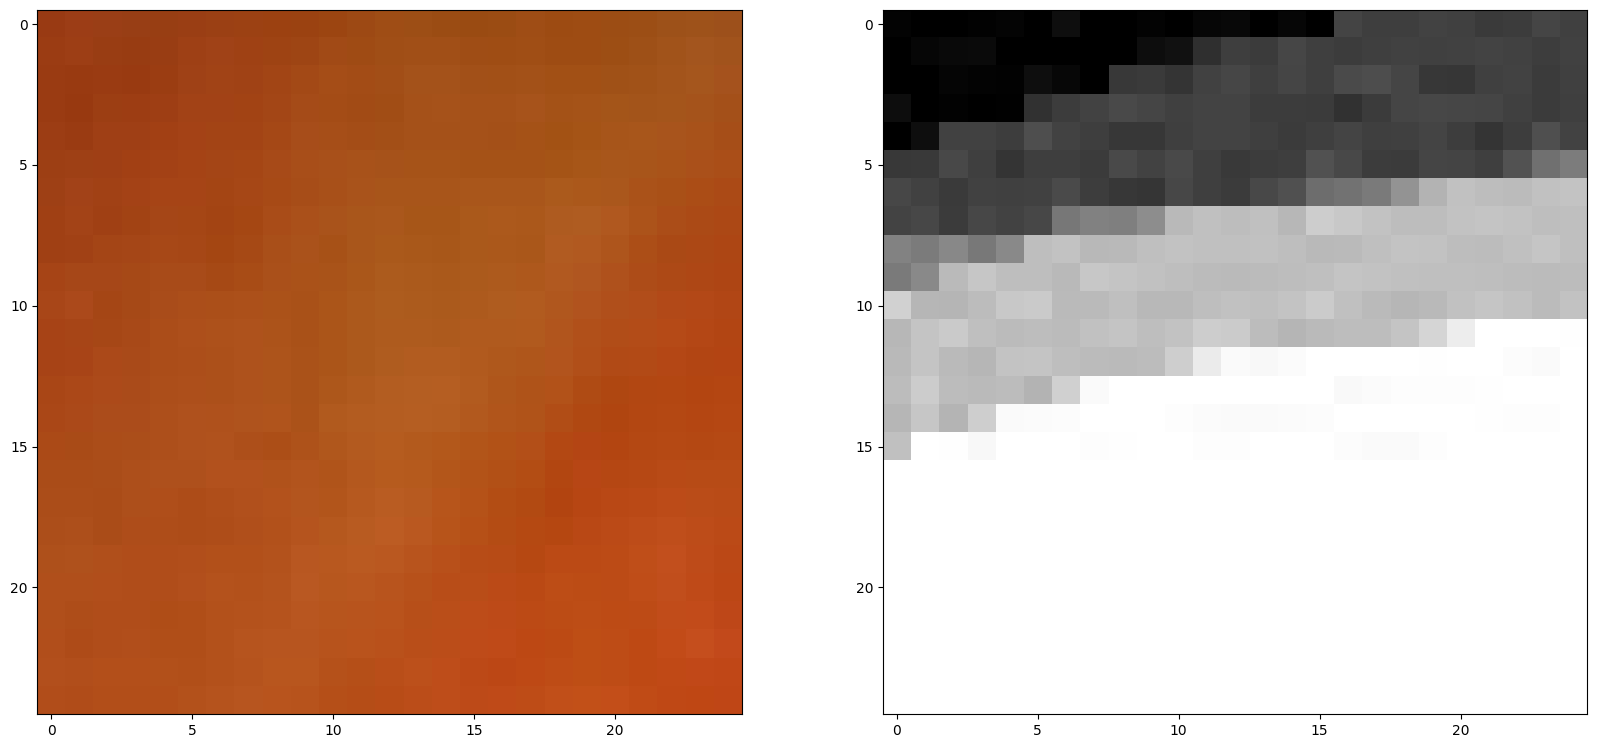

In [18]:
i=8
fig,ax = plt.subplots(1,2,figsize = (20,16))
ax[0].imshow(mat[i])
ax[1].imshow(masks[i],cmap='gray')

In [19]:
new_masks = []
for mask in masks:
  new_masks.append(cv2.cvtColor(mask,cv2.COLOR_BGR2GRAY))

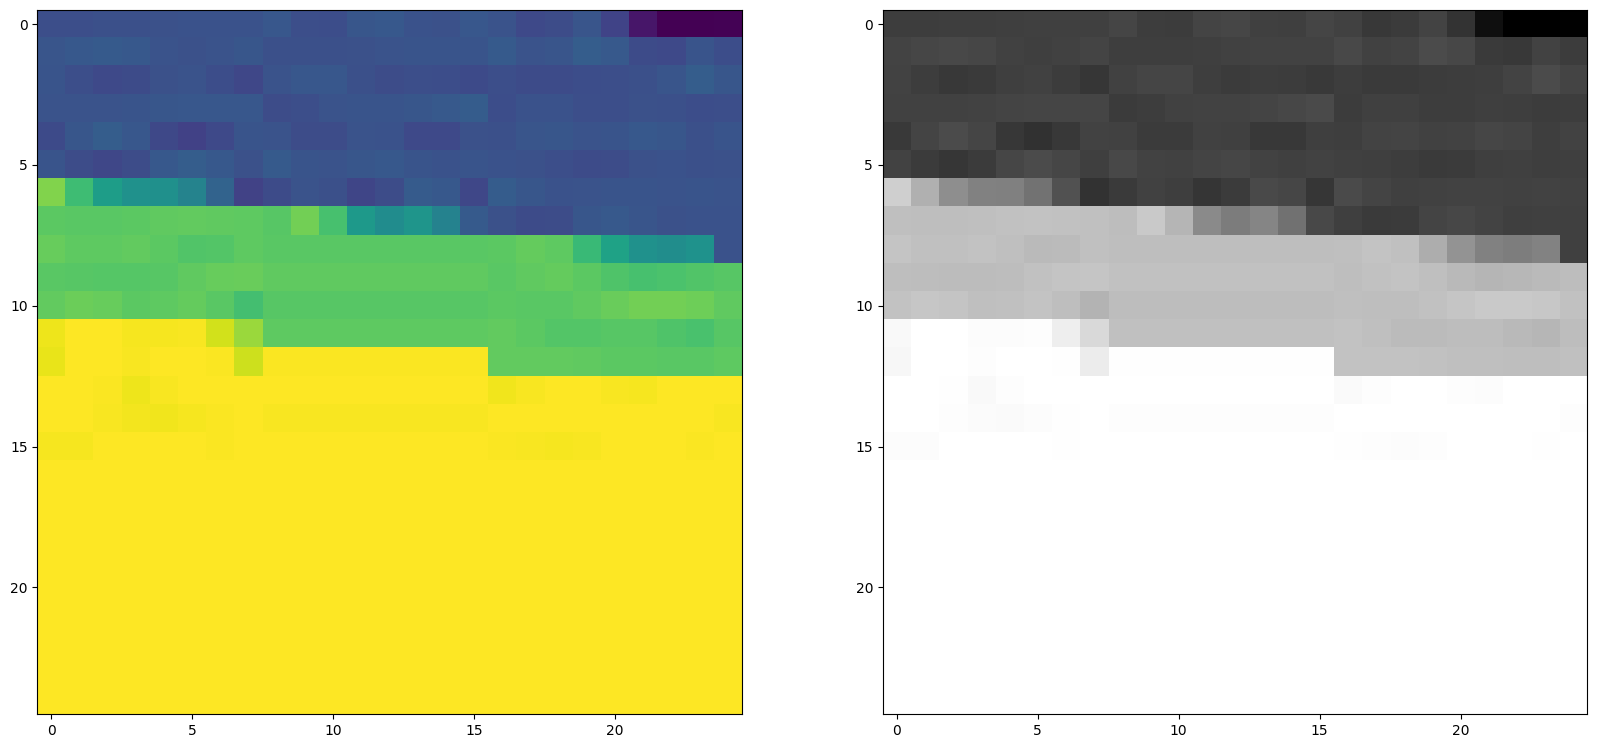

In [20]:
i=7
fig,ax = plt.subplots(1,2,figsize = (20,16))
ax[0].imshow(new_masks[i])
ax[1].imshow(masks[i])

In [ ]:
imgs[0].shape

(25, 25, 3)

In [ ]:
test_imgs[0].shape

(25, 25, 3)

In [ ]:
masks[7].shape

(25, 25, 3)

In [ ]:
new_masks[7].shape

(25, 25)

In [21]:
# Reshaping
images = []
labels = []
new_labels = []
test_images=[]
for i in range(len(imgs)):
  # dimension are inverted
  # shapes need to be divisible by 256 as the network goes 8 layers deep(2^8)
  # resizing to the closest multiple of 256
  images.append(cv2.resize(imgs[i],(24,24), interpolation = cv2.INTER_AREA))    #576,384
  test_images.append(cv2.resize(imgs[i],(24,24), interpolation = cv2.INTER_AREA))    #576,384
  # labels.append(cv2.resize(masks[i],(24,24), interpolation = cv2.INTER_AREA))   #512*704
  # new_labels.append(cv2.resize(new_masks[i],(24,24), interpolation = cv2.INTER_AREA))

In [22]:
for i in range(len(masks)):
  # dimension are inverted
  # shapes need to be divisible by 256 as the network goes 8 layers deep(2^8)
  # resizing to the closest multiple of 256
  # images.append(cv2.resize(imgs[i],(24,24), interpolation = cv2.INTER_AREA))    #576,384
  labels.append(cv2.resize(masks[i],(24,24), interpolation = cv2.INTER_AREA))   #512*704
  new_labels.append(cv2.resize(new_masks[i],(24,24), interpolation = cv2.INTER_AREA))

In [23]:
newimgs = []
for i in imgs:
  newimgs.append(cv2.cvtColor(i,cv2.COLOR_BGR2RGB))

In [24]:
print(images[0].shape)
print(labels[0].shape)
print(test_images[0].shape)
print(new_labels[0].shape)
print(len(images))

(24, 24, 3)
(24, 24, 3)
(24, 24, 3)
(24, 24)
10


In [25]:
print(imgs[0].shape)
print(test_imgs[0].shape)
print(masks[0].shape)
print(new_masks[0].shape)
print(len(imgs))

(25, 25, 3)
(25, 25, 3)
(25, 25, 3)
(25, 25)
10


In [ ]:
len(images)

10

In [26]:
X_train = np.array(images)/255
X_test = np.array(test_images)/255
Y_train = np.array(new_labels)/255
#Y_test = np.array(new_labels[56158:])/255

In [27]:
X_test.shape

(10, 24, 24, 3)

In [28]:
X_train.shape

(10, 24, 24, 3)

In [29]:
Y_train.shape

(10, 24, 24)

In [31]:
import tensorflow as tf
from tensorflow.keras.layers import Layer

In [32]:
## Please uncomment all lines in this cell and replace those marked with `# YOUR CODE HERE`.
## You can select all lines in this code cell with Ctrl+A (Windows/Linux) or Cmd+A (Mac), then press Ctrl+/ (Windows/Linux) or Cmd+/ (Mac) to uncomment.
#x^2a + xb + c


class SimpleQuadratic(Layer):

    def __init__(self, units=32, activation=None):
        '''Initializes the class and sets up the internal variables'''
        super(SimpleQuadratic, self).__init__()
        self.units = units
        self.activation = tf.keras.activations.get(activation)

    def build(self, input_shape):
        '''Create the state of the layer (weights)'''
        # a and b should be initialized with random normal, c (or the bias) with zeros.
        # remember to set these as trainable.
        a_init = tf.random_normal_initializer()
        self.a = tf.Variable(name="kernel",
            initial_value=a_init(shape=(input_shape[-1], self.units),
                                 dtype='float32'),
            trainable=True)
        b_init = tf.random_normal_initializer()
        self.b = tf.Variable(name="kernel",
            initial_value=b_init(shape=(input_shape[-1], self.units),
                                 dtype='float32'),
            trainable=True)
        c_init = tf.zeros_initializer()
        self.c = tf.Variable(name="bias",
            initial_value=c_init(shape=(self.units,),
                                 dtype='float32'),
            trainable=True)

    def call(self, inputs):
        '''Defines the computation from inputs to outputs'''
        x_squared = tf.math.square(inputs)
        x_squared_times_a = tf.matmul(x_squared, self.a)
        x_times_b = tf.matmul(inputs, self.b)
        x2a_plus_xb_plus_c = x_squared_times_a + x_times_b + self.c
        activated_x2a_plus_xb_plus_c = self.activation(x2a_plus_xb_plus_c)
        return activated_x2a_plus_xb_plus_c

In [33]:
def encoder(X,output):
  x = Conv2D(output,(3,3),activation = 'relu', padding = 'same',dilation_rate=3)(X)
  x = BatchNormalization(axis = -1)(x)
  x = Conv2D(output,(3,3),activation = 'relu', padding = 'same',dilation_rate=2)(x)
  x = BatchNormalization(axis = -1)(x)
  x = Conv2D(output,(3,3),activation = 'relu',padding = 'same')(x)
  x = BatchNormalization(axis = -1)(x)

  temp = x
  x = MaxPooling2D((2,2))(x)
  return x, temp

In [34]:
def decoder(X,output,feature):
  x = Conv2D(output, (3,3),activation = 'relu', padding = 'same')(X)
  x = BatchNormalization(axis = -1)(x)
  x = UpSampling2D((2,2))(x)
  x = Add()([feature,x])
  x = Conv2D(output,(3,3),activation = 'relu',padding = 'same')(x)
  x = BatchNormalization(axis = -1)(x)
  x = Conv2D(output,(3,3),activation = 'relu',padding = 'same')(x)
  x = BatchNormalization(axis = -1)(x)
  # print(x)
  return x

In [39]:
def func_auto(intput_shape):

  X_input = Input(input_shape)

  #encoder
  x,temp1 = encoder(X_input,3)

  #decoder
  x = decoder(x,3,temp1)

  decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
  decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(decoded)
  decoded = SimpleQuadratic(1, activation='sigmoid')(decoded)


  model = Model(inputs = X_input, outputs = decoded, name = 'func_auto')
  return model

In [40]:
input_shape = (24,24,3)
model = func_auto(input_shape)

In [41]:
def contrastive_loss_with_margin(margin):
    def contrastive_loss(y_true, y_pred):
        '''Contrastive loss from Hadsell-et-al.'06
        http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
        '''
        square_pred = K.square(y_pred)
        margin_square = K.square(K.maximum(margin - y_pred, 0))
        return K.mean(y_true * square_pred + (1 - y_true) * margin_square)
    return contrastive_loss

In [42]:
import math
from math import log

In [43]:
import tensorflow.keras.backend as K

In [44]:
def MixedLoss(y_true, y_pred):          # 80% Binary cross entropy   & 20% contrastive loss
    term1=(y_true * (0.8*K.log (y_pred+0.001))+(0.2*y_pred*y_pred))
    term2=((1-y_true) * (0.8*K.log (1-(y_pred+0.001))+0.2*(K.max((0.5-y_pred),0)**2)))
    z=term1+term2
    return -1*(K.sum(K.sum(z))/(512*768))

In [45]:
def MixedLoss2(y_true, y_pred):          # 80% Binary cross entropy   & 20% contrastive loss
    term1=(y_true * (0.8*K.log (y_pred+0.001))+(0.2*y_pred*y_pred))
    term2=((1-y_true) * (0.7*K.log (1-(y_pred+0.001))+0.3*(K.max((0.1-y_pred),0)**2)))
    z=term1+term2
    return -1*(K.sum(K.sum(z))/(512*768))

In [46]:
import numpy.matlib

In [ ]:
Y_test

In [47]:
model.compile(optimizer = 'Adam', loss = MixedLoss2)

In [48]:
model.summary()

Model: "func_auto"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 24, 24, 3)]  0           []                               
                                                                                                  
 conv2d_16 (Conv2D)             (None, 24, 24, 3)    84          ['input_3[0][0]']                
                                                                                                  
 batch_normalization_12 (BatchN  (None, 24, 24, 3)   12          ['conv2d_16[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 conv2d_17 (Conv2D)             (None, 24, 24, 3)    84          ['batch_normalization_12[

In [ ]:
len(model.layers)

18

In [49]:
model.fit(X_train, Y_train,
                epochs=200,
                batch_size=16,
                shuffle=True,
                use_multiprocessing=True,
                workers=4)

Epoch 1/200
1/1 [==============================] - 5s 5s/step - loss: 0.0071
Epoch 2/200
1/1 [==============================] - 0s 65ms/step - loss: 0.0071
Epoch 3/200
1/1 [==============================] - 0s 55ms/step - loss: 0.0071
Epoch 4/200
1/1 [==============================] - 0s 53ms/step - loss: 0.0070
Epoch 5/200
1/1 [==============================] - 0s 59ms/step - loss: 0.0070
Epoch 6/200
1/1 [==============================] - 0s 48ms/step - loss: 0.0070
Epoch 7/200
1/1 [==============================] - 0s 52ms/step - loss: 0.0070
Epoch 8/200
1/1 [==============================] - 0s 49ms/step - loss: 0.0070
Epoch 9/200
1/1 [==============================] - 0s 55ms/step - loss: 0.0070
Epoch 10/200
1/1 [==============================] - 0s 58ms/step - loss: 0.0069
Epoch 11/200
1/1 [==============================] - 0s 57ms/step - loss: 0.0069
Epoch 12/200
1/1 [==============================] - 0s 58ms/step - loss: 0.0069
Epoch 13/200
1/1 [==============================] -

In [ ]:
import pickle
file_name = 'model.pkl'

with open(file_name,'wb') as file:
  pickle.dump(model,file)

In [ ]:
import pickle
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

In [50]:
predictions = model.predict(X_test)

1/1 [==============================] - 0s 261ms/step


In [51]:
output_folder = "reviser_patch_predictions"
os.makedirs(output_folder, exist_ok=True)

for i in range(len(predictions)):
    prediction_image = predictions[i].reshape((24,24))
    filename = "Prediction_{}".format(lsorted[i])
    filepath = os.path.join(output_folder, filename)
    Image.fromarray((prediction_image * 255).astype(np.uint8)).save(filepath)

In [52]:
!zip -r /content/reviser_patch_predictions.zip /content/reviser_patch_predictions

  adding: content/reviser_patch_predictions/ (stored 0%)
  adding: content/reviser_patch_predictions/Prediction_image_ambiguity_091_25_220_389.png (stored 0%)
  adding: content/reviser_patch_predictions/Prediction_image_ambiguity_091_25_221_376.png (deflated 1%)
  adding: content/reviser_patch_predictions/Prediction_image_ambiguity_091_25_221_374.png (deflated 1%)
  adding: content/reviser_patch_predictions/Prediction_image_ambiguity_091_25_221_373.png (deflated 1%)
  adding: content/reviser_patch_predictions/Prediction_image_ambiguity_091_25_221_371.png (deflated 1%)
  adding: content/reviser_patch_predictions/Prediction_image_ambiguity_091_25_221_375.png (stored 0%)
  adding: content/reviser_patch_predictions/Prediction_image_ambiguity_091_25_221_377.png (deflated 1%)
  adding: content/reviser_patch_predictions/Prediction_image_ambiguity_091_25_220_397.png (stored 0%)
  adding: content/reviser_patch_predictions/Prediction_image_ambiguity_091_25_220_396.png (stored 0%)
  adding: conte

In [ ]:
newimgs[1].shape

(25, 25, 3)

In [ ]:
predictions[1].shape

(24, 24, 1)

In [ ]:
Y_test[1].shape

(24, 24)

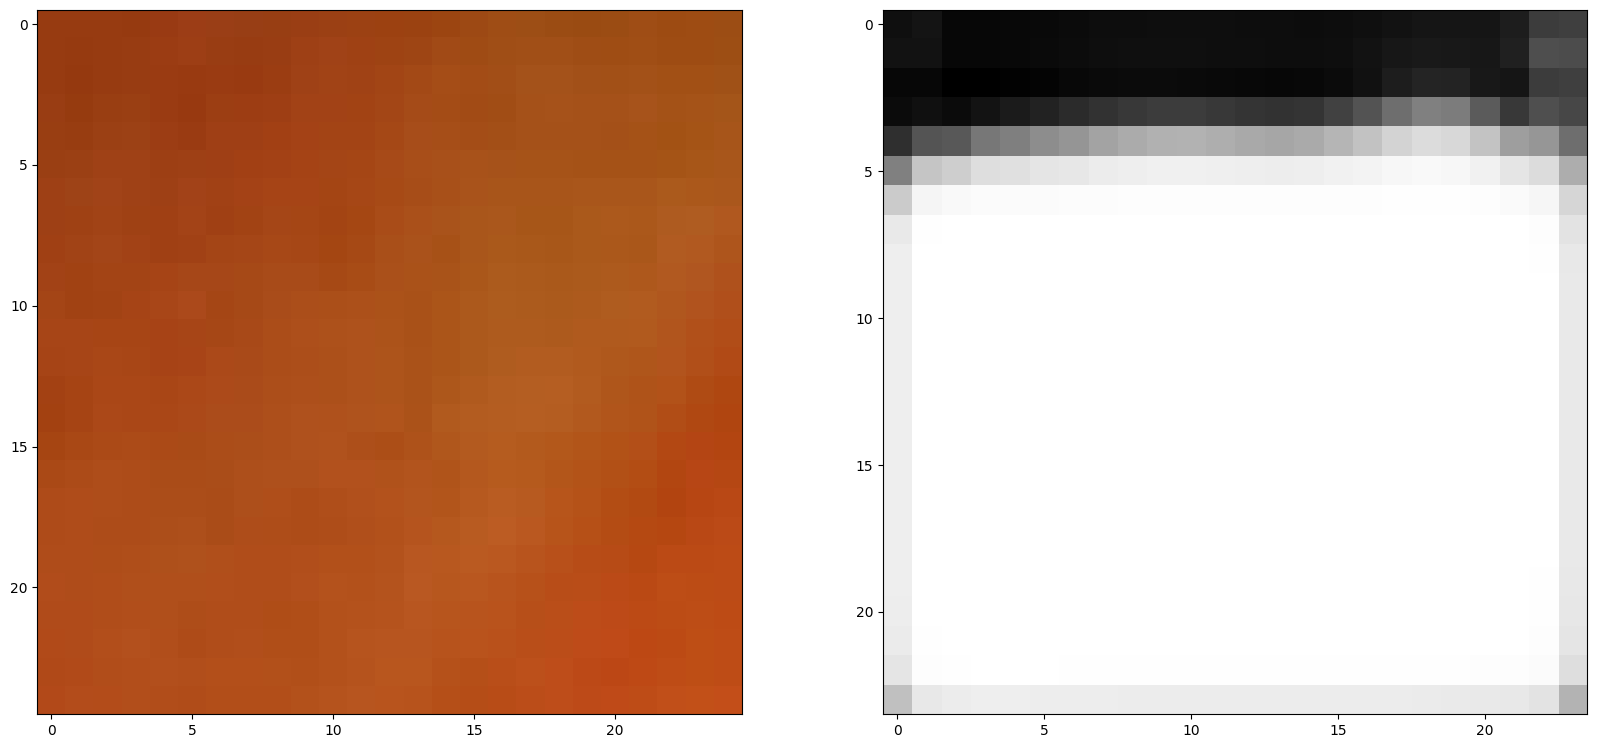

In [53]:
i=7
fig,ax = plt.subplots(1,2,figsize = (20,16))
ax[0].imshow(newimgs[i],cmap='gray')
ax[1].imshow(predictions[i].reshape(predictions[i].shape),cmap = 'gray')
#ax[2].imshow(Y_test[i]),cmap = 'gray')

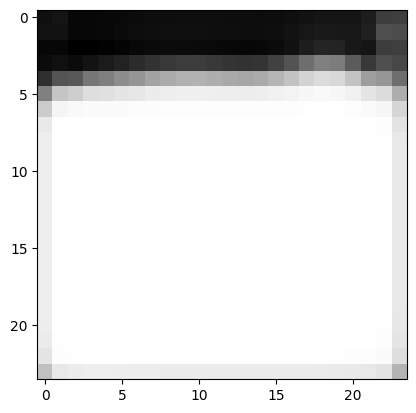

In [54]:
plt.imshow(predictions[i],cmap = 'gray')

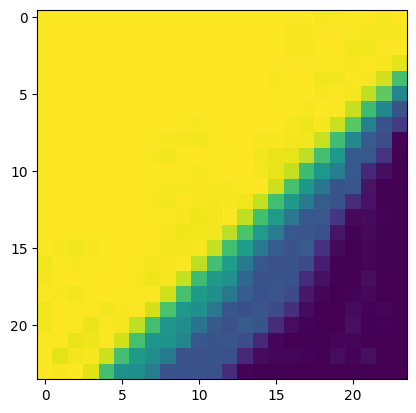

In [ ]:
plt.imshow(Y_test[i])

In [ ]:
T = 0
F = 0
idx = 6
k = predictions[idx]
for i in range(predictions[idx].shape[0]):
  for j in range(predictions[idx].shape[1]):
    if(abs(k[i][j][0] - Y_test[idx][i][j]) < 0.1):
      T = T+1
    else:
      F = F+1

NameError: ignored

In [ ]:
T/(T+F)

0.6666666666666666

In [ ]:
np.shape(Y_test[8])

(24, 24)

In [ ]:
np.shape(predictions[8])

(24, 24, 1)

In [ ]:
from sklearn.metrics import jaccard_score

In [ ]:
idx=6
for i in range(predictions[idx].shape[0]):
  for j in range(predictions[idx].shape[1]):
    if predictions[idx][i][j] < 0.5:
      predictions[idx][i][j] = 0
    else:
      predictions[idx][i][j] = 1

In [ ]:
idx =6
for i in range(Y_test[idx].shape[0]):
  for j in range(Y_test[idx].shape[1]):
    if Y_test[idx][i][j] < 0.5:
      Y_test[idx][i][j] = 0
    else:
      Y_test[idx][i][j] = 1

In [ ]:
# To calculate Jaccard similarity index
img_true=np.array(Y_test[idx]).ravel()
img_pred=np.array(predictions[idx]).ravel()
iou = jaccard_score(img_true,img_pred)

In [ ]:
iou

0.7361111111111112

In [ ]:
def compute_dice(label_img, pred_img, p_threshold=0.5):
    p = pred_img.astype(np.float)
    l = label_img.astype(np.float)
    if p.max() > 127:
        p /= 255.
    if l.max() > 127:
        l /= 255.

    p = np.clip(p, 0, 1.0)
    l = np.clip(l, 0, 1.0)
    p[p > 0.5] = 1.0
    p[p < 0.5] = 0.0
    l[l > 0.5] = 1.0
    l[l < 0.5] = 0.0
    product = np.dot(l.flatten(), p.flatten())
    dice_num = 2 * product
    pred_sum = p.sum()
    label_sum = l.sum()
    dice_den = pred_sum + label_sum
    dice_val = dice_num / dice_den
    return dice_val

In [ ]:
#idx=5
compute_dice(Y_test[idx], predictions[idx], p_threshold=0.1)

In [ ]:
# from skimage.measure import compare_ssim
from skimage.metrics import structural_similarity as compare_ssim

In [ ]:
(score, diff) = compare_ssim(Y_test[idx], predictions[idx][:,:,0], multichannel= True, full=True)

<ipython-input-119-09a39348b909>:1: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  (score, diff) = compare_ssim(Y_test[idx], predictions[idx][:,:,0], multichannel= True, full=True)
/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


In [ ]:
score

0.6506909966002487

In [ ]:
idx=8
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(Y_test[idx], predictions[idx][:,:,0])